# Assessing Classification Performance

In [87]:
data_filepath = str(u"C:\\Users\\Alison Link\\Documents\\INET4710\\FinalProjectData\\")

train_images = [
    [data_filepath + u'classified_images\\StPaulCampus_3neg_3pos_035NDVI_cutoff\\StPaulCampus_3pos_3neg_TRAIN.tif', # just west of downtown St. Paul (by St. Paul campus)  
    data_filepath + u'ground_truth_comparison_data\\comparison_clips\\comparison_clip_TRAIN.tif']
]

test_images = [
    [data_filepath + u'classified_images\\StPaulCampus_3neg_3pos_035NDVI_cutoff\\StPaulCampus_3pos_3neg_TEST0.tif', # downtown Minneapolis
     data_filepath + u'ground_truth_comparison_data\\comparison_clips\\comparison_clip_TEST0.tif'],
    [data_filepath + u'classified_images\\StPaulCampus_3neg_3pos_035NDVI_cutoff\\StPaulCampus_3pos_3neg_TEST1.tif', # just east of downtown Minneapolis
     data_filepath + u'ground_truth_comparison_data\\comparison_clips\\comparison_clip_TEST1.tif'],
    [data_filepath + u'classified_images\\StPaulCampus_3neg_3pos_035NDVI_cutoff\\StPaulCampus_3pos_3neg_TEST2.tif', # downtown St. Paul
     data_filepath + u'ground_truth_comparison_data\\comparison_clips\\comparison_clip_TEST2.tif']
]

We can start with a quick and dirty version of an accuracy assessment that simply looks at the question: _Did the modeling process help us accurately discern the difference between vegetation and non-vegetation land use classes?_  We can address this question by grouping together NDVI-postive NDVI-negative land use classes from both the training/test data and the "ground truth" comparison data, and seeing where they overlap.  

The function below compares pixels from the train/test images with the corresponding pixels from the "ground truth" images and identifies pixels where the NDVI values do not align.  The dictionary mapping below, that indicates which classification numbers from each of the datasets are associated with vegetation (NDVI-positive) and non-vegetation (NDVI-negative).

In [128]:
# Dictionary to map which classes are NDVI positive and which are negative in the training and 
# "ground truth" data
ndvi_dict = {
    'train_test_ndvi_pos': [1, 2, 3],
    'gt_ndvi_pos': [1, 6, 7, 8, 9, 10],
    'train_test_ndvi_neg': [0, 4, 5, 6],
    'gt_ndvi_neg': [2, 3, 4, 5, 11, 12]
}

import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def calculate_ndvi_classification_performance(img_set, ndvi_dict):
    ''' Does the model discern correctly between pixels that are NDVI + and NDVI - ? 
    Take an image set as an input (with the target image first, and the ground truth 
    comparison image second).  Compare where they match and where they don't. '''
    
    classified_img = rasterio.open(img_set[0])
    gt_img = rasterio.open(img_set[1])
    
    classification = classified_img.read(1).astype('int')
    gt_class = gt_img.read(1).astype('int')
    
    ndvi_classification_accuracy = np.empty(classified_img.shape, dtype=rasterio.int8)
    ndvi_classification_accuracy = np.where(
        np.logical_or(np.logical_and(np.isin(classification, ndvi_dict['train_test_ndvi_pos']), 
                                     np.isin(gt_class, ndvi_dict['gt_ndvi_pos'])),
                      np.logical_and(np.isin(classification, ndvi_dict['train_test_ndvi_neg']), 
                                     np.isin(gt_class, ndvi_dict['gt_ndvi_neg']))) , 1, 0) # 1 if they match, 0 if they don't
    
    accuracy_pct = round((np.sum(ndvi_classification_accuracy) / classification.size) * 100, 3) 
    print("NDVI classification accuracy = " + str(accuracy_pct))
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(21,7))
    
    ax1.imshow(ndvi_classification_accuracy)
    ax1.set_title("NDVI misclassified regions")

    return(ndvi_classification_accuracy)

Looking at the output below, we see that, in general, the NDVI misclassification seems to occur on the boundaries of objects, where one land use class bumps up against another.  This is not entirely surprising, as these are the regions where there is some genuine ambiguity: pixels themselves--particularly in liminal regions between classes--are not "pure" representations of substances, and instead represent a "mixing" of reflectance from the earth's surface before it hits a sensor and is encoded back into discretized pixel units.  The remote sensing literature is full of references to the conundrums of "spectral unmixing", which is an unavoidable phenomenon in remotely sensed imagery (see: Ma, et al., 2014; Keshava & Mustard, 2002). In general, however, a bit of misclassification "noise" around the edges of land use classes should not be overly concerning to us--particularly when the classifications were derived from vastly different methodologies, as is the case here.

There are a few regions where the misclassifications appear more systematic--particularly in the upper left region of the training image.  Examining this discrepancy in a GIS reveals that this is due to annual change in agricultural growth that is not represented in the "ground truth" comparison data.  The "ground truth" dataset classifies this as agricultural land, but at the time when the training image was captured, this land happend to be lying fallow.  In some respect, then, the model was actually "more" correct in its classification than the "ground truth": the model classified this land as dirt/soil, because it happened to be exactly that at the time of the image capture!

NDVI classification accuracy = 87.778


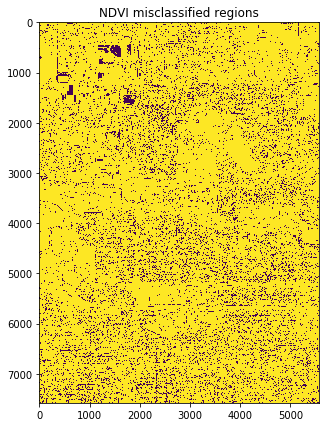

In [124]:
accuracy_array = calculate_ndvi_classification_performance(train_images[0], ndvi_dict)

In [126]:
# Dictionary to map categories for comparison between train/test classification comparable values in the 
# "ground truth" data

classification_compare_dict = {
    0: [5, 9, 10, 11], # water features
    1: [1, 8], # grass (and agriculture)
    #2: # artificial turf
    3: [6, 7], # trees
    4: [2, 12], # dirt
    5: [3, 4], # asphalt/buildings
    6: [2, 12] # sand & light roofs
}

def calculate_classification_performance(img_set, classification_compare_dict):
    
    classified_img = rasterio.open(img_set[0])
    gt_img = rasterio.open(img_set[1])
    
    classification = classified_img.read(1).astype('int')
    gt_class = gt_img.read(1).astype('int')
    
    
    fig, axs = plt.subplots(2,5, figsize=(20, 5))
    
    misclassification_rates = []
    
    for classification in classification_compare_dict.keys():
        print(classification)
        
        misclassified_pixels = np.where()
        
        axs[i].imshow()
        axs[i].set_title("Class " + str(i) + " misclassified pixels")

In [127]:
calculate_classification_performance(train_images[0], classification_compare_dict)

0
1
3
4
5
6
